In [1]:
import os
import pandas as pd
os.getcwd()

'C:\\Users\\yogesh\\OneDrive\\Desktop\\python'

In [2]:
Data=pd.read_excel('DATUM EXCEL.xlsx')

In [3]:
Data=Data.drop(columns=['Materials'])
Data.shape

(130, 32)

In [4]:
Data=Data.drop_duplicates()
Data.shape

(130, 32)

In [5]:
Data['Condition'].value_counts()

STA         55
annealed    22
Heating     16
ST          12
pure        10
Pure         9
aged         4
annelaed     2
Name: Condition, dtype: int64

In [6]:
import numpy as np
Data['Condition']=np.where(Data['Condition']=='annelaed','annealed',Data['Condition'])
Data['Condition']=np.where(Data['Condition']=='Pure','pure',Data['Condition'])

In [7]:
Data['Condition'].value_counts()

STA         55
annealed    24
pure        19
Heating     16
ST          12
aged         4
Name: Condition, dtype: int64

In [8]:
Data=pd.get_dummies(Data)
Data.shape

(130, 37)

In [9]:
x=Data.drop(columns=['Elastic Modulus (GPA)','Ultimate Tensile(MPA)','Yield strength(MPA) (Max)','Elongation(%)'])
y=Data['Elastic Modulus (GPA)']

In [10]:
print(x.shape)
print(y.shape)

(130, 33)
(130,)


In [11]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
x1train,x1test,y1train,y1test=train_test_split(x,y,test_size=0.2)

In [12]:
print(x1train.shape)
print(y1train.shape)
print(x1test.shape)
print(y1test.shape)

(104, 33)
(104,)
(26, 33)
(26,)


In [13]:
x1train=x1train.reset_index(drop=True)
y1train=y1train.reset_index(drop=True)
x1test=x1test.reset_index(drop=True)

In [14]:
x1train=x1train.iloc[:,:].values
x1test=x1test.iloc[:,:].values
y1train=y1train.values.flatten()

In [15]:
y1train=y1train.reshape(-1,1)

In [16]:
from sklearn.preprocessing import StandardScaler
StdS_X = StandardScaler()
StdS_y = StandardScaler()
x1train= StdS_X.fit_transform(x1train)
y1train= StdS_y.fit_transform(y1train)
x1test=StdS_X.fit_transform(x1test)

In [17]:
from sklearn.neighbors import KNeighborsRegressor as Kns
from sklearn.metrics import mean_squared_error 
from math import sqrt

In [18]:
#getting a lower rmse value by establishing a loop!

result1=pd.DataFrame(columns=['K','Rmse'])
for k in range(1,100):
    result_temp=pd.DataFrame(columns=['K','Rmse'])
    kns=Kns(n_neighbors=k)
    kns=kns.fit(x1train,y1train)
    y_pred1=kns.predict(x1test)
    y_pred1 =StdS_y.inverse_transform(y_pred1)
    rmse1=sqrt(mean_squared_error(y1test,y_pred1))
    result_temp=pd.DataFrame({'K':[k],'Rmse':[rmse1]})
    result1=pd.concat([result1,result_temp],axis=0)

In [19]:
a1=result1['Rmse'].min()
b1=result1[result1['Rmse']==a1]
A=b1['K'].astype(int)
rmse1=b1['Rmse']
rmse1=rmse1[0]
b1

K       Rmse
0  13  10.604738

In [20]:
kns=Kns(n_neighbors=A[0])
kns=kns.fit(x1train,y1train)
y_pred1=kns.predict(x1test)
y_pred1=StdS_y.inverse_transform(y_pred1)

In [21]:
data1=list(zip(y1test,y_pred1))
comparison1=pd.DataFrame(data1,columns=['Actual','Predicted'])
print(comparison1)

    Actual             Predicted
0    104.1  [103.23846153846154]
1    120.0  [109.07692307692308]
2    110.0  [109.21538461538461]
3    103.4  [104.95384615384616]
4    115.0  [112.21538461538461]
5    103.4  [103.23846153846154]
6    122.0  [110.38461538461539]
7    109.0   [104.6923076923077]
8    110.0  [111.61538461538461]
9    103.0  [105.11538461538461]
10   105.0               [105.0]
11   122.0  [110.67692307692307]
12    62.0  [108.23846153846154]
13   110.0  [112.61538461538461]
14   108.0   [104.6923076923077]
15   110.3  [111.58461538461539]
16   122.0  [110.67692307692307]
17    86.0   [97.38461538461539]
18    88.0   [96.61538461538461]
19   113.8   [111.8923076923077]
20   113.8               [111.2]
21   110.0  [111.84615384615384]
22   104.1  [103.23846153846154]
23   110.0  [110.27692307692308]
24   105.0  [105.15384615384616]
25   112.0  [112.46153846153845]


<function matplotlib.pyplot.show(close=None, block=None)>

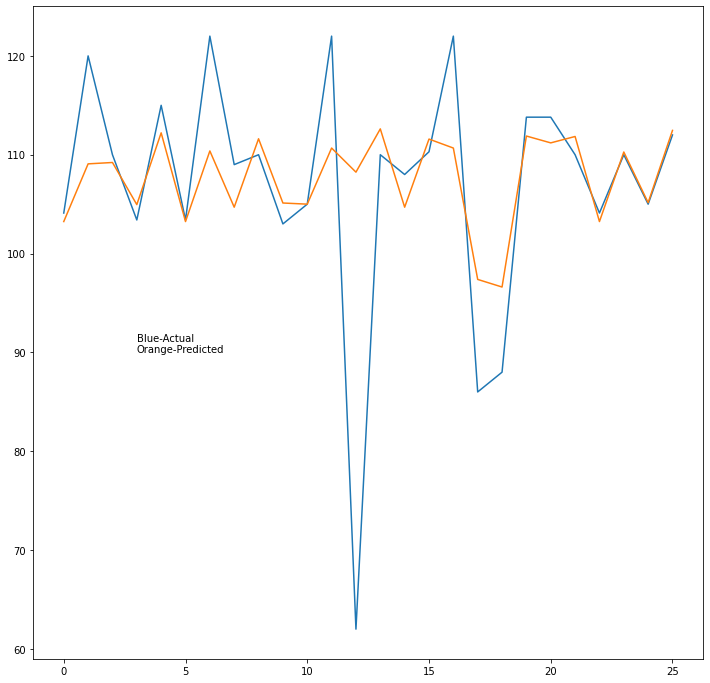

In [22]:
from matplotlib import pyplot as plt
plt.figure(figsize=(12,12))
graph1=comparison1[['Actual','Predicted']]
plt.text(3,90,'Blue-Actual \nOrange-Predicted')
plt.plot(graph1)
plt.show

In [23]:
x1=Data.drop(columns=['Elastic Modulus (GPA)','Ultimate Tensile(MPA)','Yield strength(MPA) (Max)','Elongation(%)'])
y1=Data['Ultimate Tensile(MPA)']

In [24]:
print(x1.shape)
print(y1.shape)

(130, 33)
(130,)


In [25]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
x2train,x2test,y2train,y2test=train_test_split(x1,y1,test_size=0.2)

In [26]:
print(x2train.shape)
print(y2train.shape)
print(x2test.shape)
print(y2test.shape)

(104, 33)
(104,)
(26, 33)
(26,)


In [27]:
x2train=x2train.reset_index(drop=True)
y2train=y2train.reset_index(drop=True)
x2test=x2test.reset_index(drop=True)

In [28]:
x2train=x2train.iloc[:,:].values
x2test=x2test.iloc[:,:].values
y2train=y2train.values.flatten()

In [29]:
y2train=y2train.reshape(-1,1)

In [30]:
from sklearn.preprocessing import StandardScaler
StdS_X = StandardScaler()
StdS_y = StandardScaler()
x2train= StdS_X.fit_transform(x2train)
y2train= StdS_y.fit_transform(y2train)
x2test=StdS_X.fit_transform(x2test)

In [31]:
from sklearn.neighbors import KNeighborsRegressor as Kns
from sklearn.metrics import mean_squared_error 
from math import sqrt

In [32]:
result2=pd.DataFrame(columns=['K'])
for k in range(1,50):
    result_temp=pd.DataFrame(columns=['K'])
    kns=Kns(n_neighbors=k)
    kns=kns.fit(x2train,y2train)
    y_pred2=kns.predict(x2test)
    y_pred2 =StdS_y.inverse_transform(y_pred2)
    rmse2=sqrt(mean_squared_error(y2test,y_pred2))
    result_temp=pd.DataFrame({'K':[k],'Rmse':[rmse2]})
    result2=pd.concat([result2,result_temp],axis=0)

In [33]:
a2=result2['Rmse'].min()
b2=result2[result2['Rmse']==a2]
B=b2['K'].astype(int)
rmse2=b2['Rmse']
rmse2=rmse2[0]
kns=Kns(n_neighbors=B[0])
kns=kns.fit(x2train,y2train)
y_pred2=kns.predict(x2test)
y_pred2=StdS_y.inverse_transform(y_pred2)
data2=list(zip(y2test,y_pred2))
comparison2=pd.DataFrame(data2,columns=['Actual','Predicted'])
print(comparison2)

    Actual             Predicted
0     1600              [1410.0]
1      930  [1086.6666666666667]
2      124  [151.66666666666663]
3      450  [378.33333333333337]
4     1380              [1200.0]
5     1475              [1323.0]
6      440               [444.0]
7     1240  [1136.6666666666667]
8      345   [428.3333333333333]
9      760   [993.3333333333334]
10     830               [639.0]
11    1210              [1340.0]
12     430               [338.0]
13    1240  [1176.6666666666667]
14     220  [236.66666666666663]
15     900   [963.3333333333334]
16    1080              [1004.0]
17     345  [466.66666666666663]
18    1240              [1195.0]
19    1255  [1136.6666666666667]
20     990  [1176.6666666666667]
21     900  [1086.6666666666667]
22    1560              [1410.0]
23     861   [507.3333333333333]
24     800               [845.0]
25     800               [845.0]


In [34]:
b2

K        Rmse
0  3  141.720638

<function matplotlib.pyplot.show(close=None, block=None)>

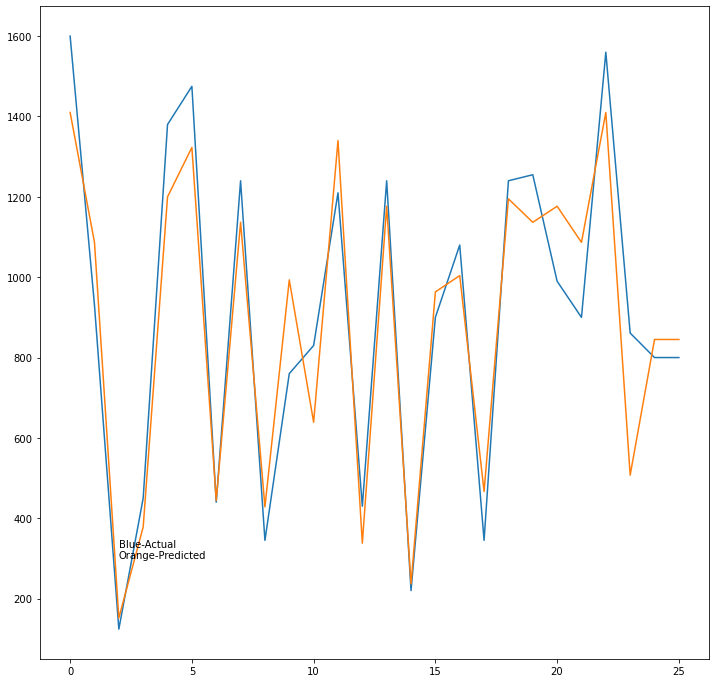

In [35]:
from matplotlib import pyplot as plt
plt.figure(figsize=(12,12))
graph2=comparison2[['Actual','Predicted']]
plt.text(2,300,'Blue-Actual \nOrange-Predicted')
plt.plot(graph2)
plt.show

In [36]:
x2=Data.drop(columns=['Elastic Modulus (GPA)','Ultimate Tensile(MPA)','Yield strength(MPA) (Max)','Elongation(%)'])
y2=Data['Yield strength(MPA) (Max)']

In [37]:
print(x2.shape)
print(y2.shape)

(130, 33)
(130,)


In [38]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
x3train,x3test,y3train,y3test=train_test_split(x2,y2,test_size=0.2)

In [39]:
print(x3train.shape)
print(y3train.shape)
print(x3test.shape)
print(y3test.shape)

(104, 33)
(104,)
(26, 33)
(26,)


In [40]:
x3train=x3train.reset_index(drop=True)
y3train=y3train.reset_index(drop=True)
x3test=x3test.reset_index(drop=True)

In [41]:
x3train=x3train.iloc[:,:].values
x3test=x3test.iloc[:,:].values
y3train=y3train.values.flatten()

In [42]:
y3train=y3train.reshape(-1,1)

In [43]:
from sklearn.preprocessing import StandardScaler
StdS_X = StandardScaler()
StdS_y = StandardScaler()
x3train= StdS_X.fit_transform(x3train)
y3train= StdS_y.fit_transform(y3train)
x3test=StdS_X.fit_transform(x3test)

In [44]:
from sklearn.neighbors import KNeighborsRegressor as Kns
from sklearn.metrics import mean_squared_error 
from math import sqrt

In [45]:
result3=pd.DataFrame(columns=['K'])
for k in range(1,50):
    result_temp=pd.DataFrame(columns=['K'])
    kns=Kns(n_neighbors=k)
    kns=kns.fit(x3train,y3train)
    y_pred3=kns.predict(x3test)
    y_pred3 =StdS_y.inverse_transform(y_pred3)
    rmse3=sqrt(mean_squared_error(y3test,y_pred3))
    result_temp=pd.DataFrame({'K':[k],'Rmse':[rmse3]})
    result3=pd.concat([result3,result_temp],axis=0)

In [46]:
a3=result3['Rmse'].min()
b3=result3[result3['Rmse']==a3]
C=b3['K'].astype(int)
rmse3=b3['Rmse']
rmse3=rmse3[0]
kns=Kns(n_neighbors=C[0])
kns=kns.fit(x3train,y3train)
y_pred3=kns.predict(x3test)
y_pred3=StdS_y.inverse_transform(y_pred3)
data3=list(zip(y3test,y_pred3))
comparison3=pd.DataFrame(data3,columns=['Actual','Predicted'])
print(comparison3)

    Actual             Predicted
0       90    [95.7142857142859]
1     1070               [995.0]
2      415  [359.42857142857144]
3     1300  [1002.8571428571429]
4     1210  [1010.7142857142857]
5      770  [1158.5714285714284]
6      827   [727.2857142857143]
7      710   [835.7142857142857]
8      590   [638.5714285714286]
9      380   [374.4285714285714]
10     607   [520.8571428571429]
11     140  [128.28571428571433]
12     820              [1064.0]
13     790  [1009.2857142857143]
14     830   [878.5714285714286]
15    1230  [1124.2857142857142]
16     830  [1235.2857142857142]
17     205  [171.85714285714278]
18    1248  [1073.7142857142858]
19     509   [691.4285714285714]
20    1200  [1332.4285714285713]
21     170   [374.4285714285714]
22     920   [1177.142857142857]
23    1120  [1287.1428571428573]
24    1070   [942.5714285714286]
25     825  [1034.2857142857142]


In [47]:
b3

K        Rmse
0  7  184.706732

<function matplotlib.pyplot.show(close=None, block=None)>

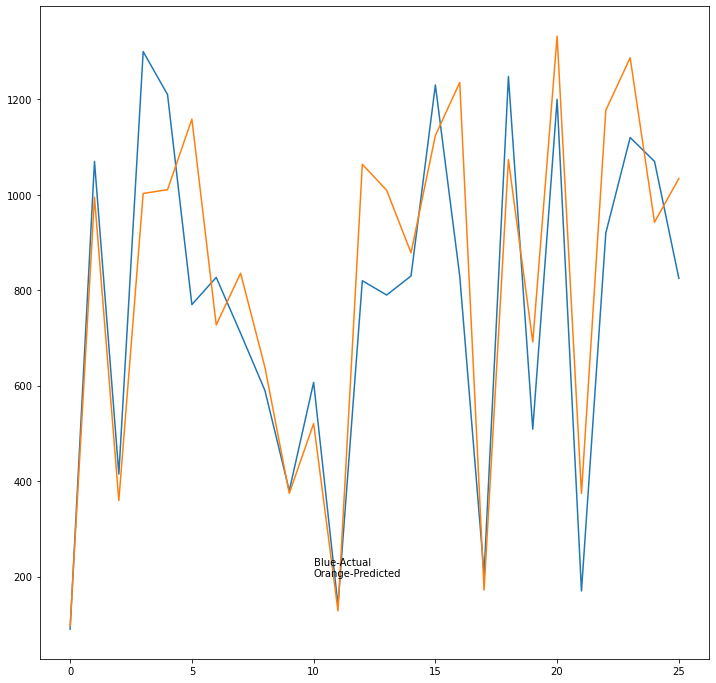

In [48]:
from matplotlib import pyplot as plt
plt.figure(figsize=(12,12))
graph3=comparison3[['Actual','Predicted']]
plt.text(10,200,'Blue-Actual \nOrange-Predicted')
plt.plot(graph3)
plt.show

In [49]:
x3=Data.drop(columns=['Elastic Modulus (GPA)','Ultimate Tensile(MPA)','Yield strength(MPA) (Max)','Elongation(%)'])
y3=Data['Elongation(%)']

In [50]:
print(x3.shape)
print(y3.shape)

(130, 33)
(130,)


In [51]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
x4train,x4test,y4train,y4test=train_test_split(x3,y3,test_size=0.2)

In [52]:
print(x4train.shape)
print(y4train.shape)
print(x4test.shape)
print(y4test.shape)

(104, 33)
(104,)
(26, 33)
(26,)


In [53]:
x4train=x4train.reset_index(drop=True)
y4train=y4train.reset_index(drop=True)
x4test=x4test.reset_index(drop=True)

In [54]:
x4train=x4train.iloc[:,:].values
x4test=x4test.iloc[:,:].values
y4train=y4train.values.flatten()

In [55]:
y4train=y4train.reshape(-1,1)

In [56]:
from sklearn.preprocessing import StandardScaler
StdS_X = StandardScaler()
StdS_y = StandardScaler()
x4train= StdS_X.fit_transform(x4train)
y4train= StdS_y.fit_transform(y4train)
x4test=StdS_X.fit_transform(x4test)

In [57]:
from sklearn.neighbors import KNeighborsRegressor as Kns
from sklearn.metrics import mean_squared_error 
from math import sqrt

In [58]:
result4=pd.DataFrame(columns=['K'])
for k in range(1,50):
    result_temp=pd.DataFrame(columns=['K'])
    kns=Kns(n_neighbors=k)
    kns=kns.fit(x4train,y4train)
    y_pred4=kns.predict(x4test)
    y_pred4 =StdS_y.inverse_transform(y_pred4)
    rmse4=sqrt(mean_squared_error(y4test,y_pred4))
    result_temp=pd.DataFrame({'K':[k],'Rmse':[rmse4]})
    result4=pd.concat([result4,result_temp],axis=0)

In [59]:
a4=result4['Rmse'].min()
b4=result4[result4['Rmse']==a4]
D=b4['K'].astype(int)
rmse4=b4['Rmse']
rmse4=rmse4[0]
kns=Kns(n_neighbors=D[0])
kns=kns.fit(x4train,y4train)
y_pred4=kns.predict(x4test)
y_pred4=StdS_y.inverse_transform(y_pred4)
data4=list(zip(y4test,y_pred4))
comparison4=pd.DataFrame(data4,columns=['Actual','Predicted'])
print(comparison4)

    Actual             Predicted
0     25.0  [25.210526315789473]
1     17.0  [19.894736842105264]
2     23.0  [11.263157894736842]
3      8.0   [10.33157894736842]
4      2.0  [10.594736842105263]
5      2.0   [8.894736842105264]
6     23.0  [18.315789473684212]
7      7.0  [12.315789473684209]
8     30.0  [19.421052631578945]
9     23.0  [11.631578947368421]
10    18.0  [14.631578947368421]
11    14.0  [10.173684210526314]
12    13.0  [11.647368421052631]
13     6.0  [10.526315789473685]
14     0.0   [9.805263157894737]
15    25.0  [25.210526315789473]
16     3.0   [9.805263157894737]
17     5.0  [11.173684210526316]
18    20.0  [25.210526315789473]
19    25.0  [25.210526315789473]
20    24.0   [21.36842105263158]
21    17.0  [12.210526315789473]
22    14.0                [15.0]
23    37.0  [22.105263157894736]
24    29.0  [12.157894736842106]
25    15.0                [11.7]


In [60]:
b4

K      Rmse
0  19  7.252985

<function matplotlib.pyplot.show(close=None, block=None)>

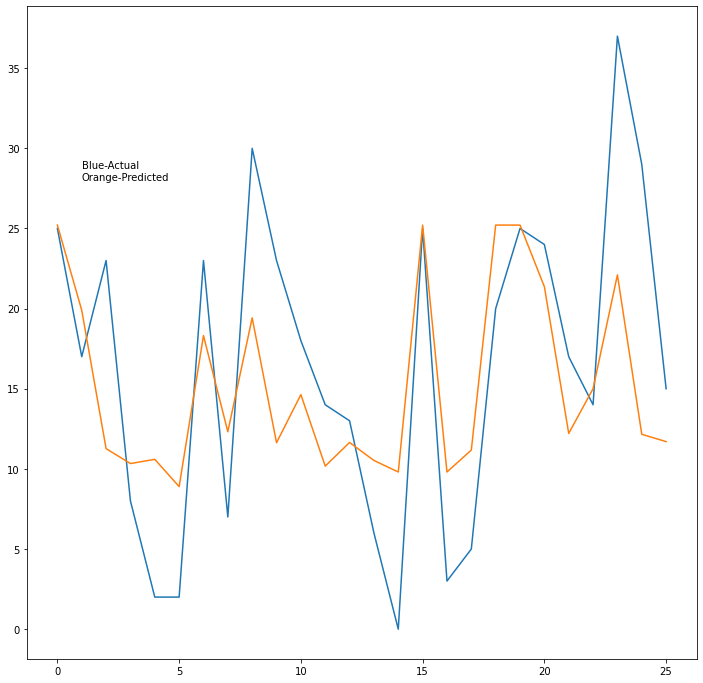

In [61]:
from matplotlib import pyplot as plt
plt.figure(figsize=(12,12))
graph4=comparison4[['Actual','Predicted']]
plt.text(1,28,'Blue-Actual \nOrange-Predicted')
plt.plot(graph4)
plt.show

In [62]:
Columns={'Parameters':['Elastic Modulus (GPA)','Ultimate Tensile(MPA)','Yield strength(MPA) (Max)','Elongation(%)'],
        'KNNerror':[rmse1,rmse2,rmse3,rmse4]}
Error=pd.DataFrame(Columns)
Error.to_excel('Errors1.xlsx')
Error

Parameters    KNNerror
0      Elastic Modulus (GPA)   10.604738
1      Ultimate Tensile(MPA)  141.720638
2  Yield strength(MPA) (Max)  184.706732
3              Elongation(%)    7.252985